## Exploratory Data Analysis of vehicles_us Data

Goal: Identify interesting patterns in the data to be displayed on the web-available dashboard. The questions explored will be around the business question "What kinds of cars should we keep in stock?"

Format:  The EDA will be broken into three stages
1. Import and clean data - handle null values and retype variable 
2. Explore Data trends

### Import and Clean Data

Import statmests for needed packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Import data from CSV

In [3]:
df_vehicles = pd.read_csv("vehicles_us.csv")
display(df_vehicles.head())
df_vehicles.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### Retype Variable

Variables that need retyping:
1. date_posted - is a string should be a pd.datetime

Note:  We are leaving the model_year and cylinders as floats even though it makes more sense to display them as ints due to the NaNs in the column.  If we convert to ints, we would need to replace them with a value such as 0 or -1 and that could affect our analysis.  It is better in this case to leave them as NaNs and effectively skip over them in the analysis step for anything that requires arithmitic.  

In [4]:
df_vehicles["date_posted"] = pd.to_datetime(df_vehicles["date_posted"])

display(df_vehicles.head())
df_vehicles.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


**Conclusion:**
The data types look good now an we can move on to exploring the the null values and fixing them

#### Filling Null Values:

We have several null values to address:
1. model_year
2. cylinders
3. odometer
4. paint_color
5. is_4wd

Of these, we are going to fix the paint_color and the is_4wd as the null values in these columns don't contain implicitly meaningful data.  Since paint_color is a string it can be safely replaced by any placeholder string to avoid any odd interactions later.  Also, is_4wd is a boolean with 1 being true and NaN being false.  We can safely repalce the NaN with 0.0 and move forward with the analysis

In [5]:
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0)
df_vehicles['paint_color'] = df_vehicles['paint_color'].fillna("None")


df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,None,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,None,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


**Conclusion:**
The data looks much better now and we can move on to the next step

### Numeric Analysis

Goal:
1. **Price:** Check for outliers, distribution, and summary statistics (mean, median, max, min). Visualize using a histogram or a box plot.
2. **Model Year:** Examine the range of years, distribution, and any trends. Visualize using a histogram or a line plotr3.
5. **Cylinders:** Check for the most common cylinder counts and any correlations with other variables. Visualize using a histogram or a bar chh4rt.
7. **Odometer:** Check for outliers, distribution, and summary statistics. Visualize using a histogram or a box 5hart.
11. **is_4wd:** Check for the distribution of 4WD vehicles. Visualize using a pie chart or a bh6togram.
13. **Days Listed:** Check for the distribution of days listed and any correlations with other variables. Visualize using a histogram ot.ull  int64 

**Price**

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

[]

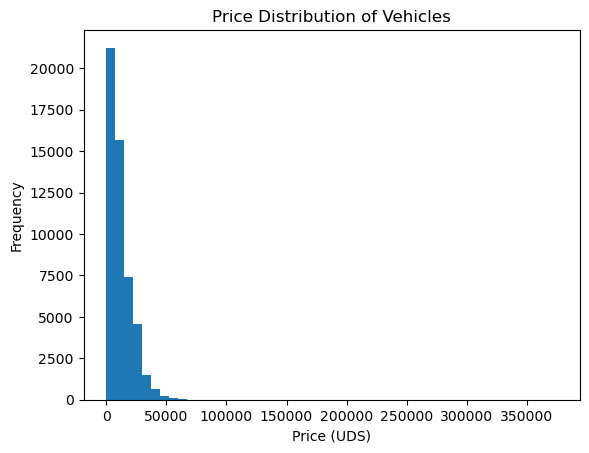

In [6]:
display(df_vehicles['price'].describe())
df_vehicles['price'].plot(kind='hist',bins=50)
plt.title('Price Distribution of Vehicles')
plt.xlabel('Price (UDS)')
plt.plot()


**Conclusion:**
The data is very right skewed, which is expected.  The median price is a better measure of center and is about $9,000.  Questions that arise from this chart:
 1. What factors push a vehicle so low
 2. what factors mark the <75% of vehicles

**Next Step**
Since our question is related to the economic impact of different kinds of cars in stock exploring the correlation of price with the other factors is a prudent next step.

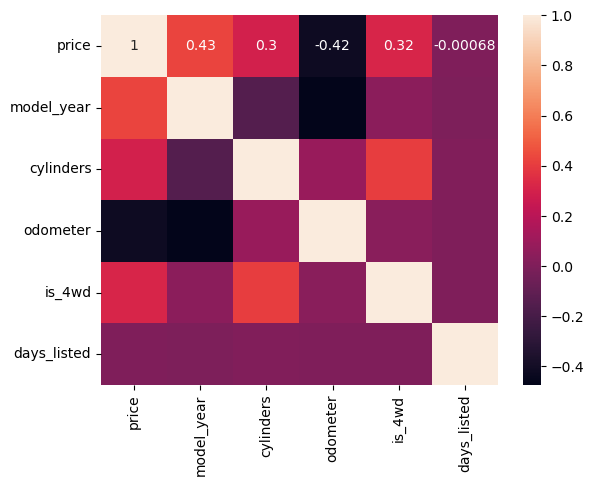

In [13]:

corr_matrix = sb.heatmap(df_vehicles.corr(numeric_only=True),annot=True)

plt.show()

**Conclusion:**
It looks like there are 2 significant correlations in the data.  There is a negative correlation between how many miles are on the odometer and the price and there is a slight positive correlation between the price and the number of cylinders in the engine.  Notebally the days_listed is not correlated with the price or any other factor.

**Next Steps**
We need to look at the distribution of milage, cylinders, and model_year.

**model_year**

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

[]

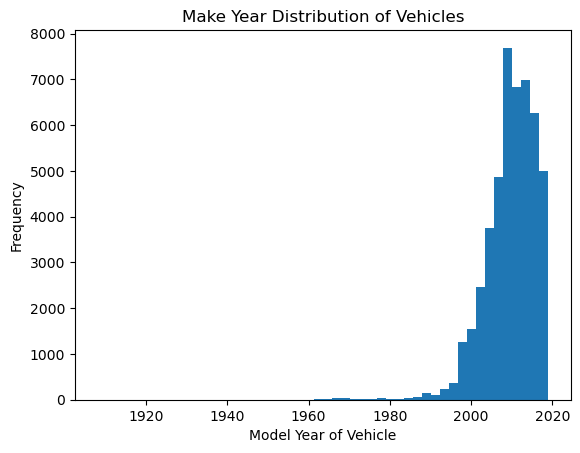

In [15]:
display(df_vehicles['model_year'].describe())
df_vehicles['model_year'].plot(kind='hist',bins=50)
plt.title('Make Year Distribution of Vehicles')
plt.xlabel('Model Year of Vehicle')
plt.plot()


**Notes**

The data is left-skewed, which is expected and the median year is 2011.  Since there is a positive correlation we would expect with model year and price we would expect the older models to sell for less. 

[]

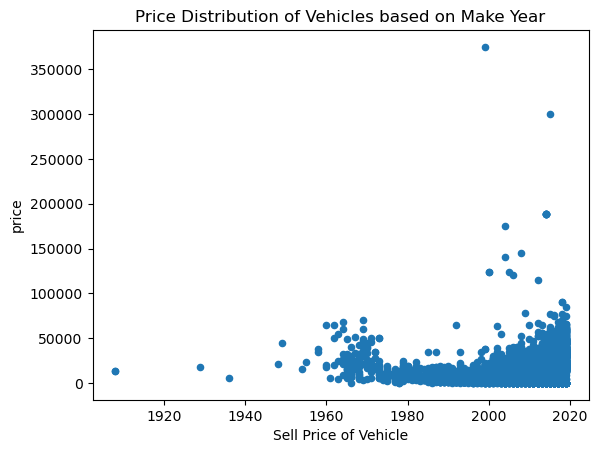

In [16]:
df_vehicles.plot(kind='scatter',x='model_year',y='price')
plt.title('Price Distribution of Vehicles based on Make Year')
plt.xlabel('Model Year of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.plot()


**Conclusion**
The distribution here shows that most of the expensive vehicles are made in 2000 or above, but there seems to be a clasic car periemum that is concentrated mostly around the 60s - 70s.  It is notable that the oldest cars don't carry the same perimum that many of the 60s - 70s cars do.

**odometer**

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

[]

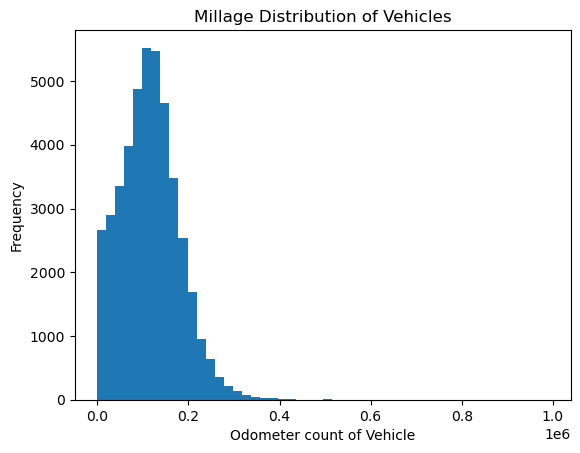

In [19]:
display(df_vehicles['odometer'].describe())
df_vehicles['odometer'].plot(kind='hist',bins=50)
plt.title('Mileage Distribution of Vehicles')
plt.xlabel('Odometer count of Vehicle')
plt.plot()

**Notes** 
The data is right-skewed but it is noteable that most of the cars are below 113,000 miles.  It is worth noting here that there are some cars missing since some did not have the odometer reported. 

[]

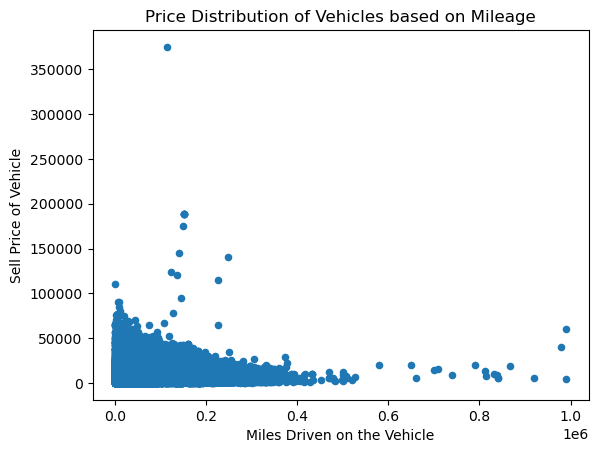

In [23]:
df_vehicles.plot(kind='scatter',x='odometer',y='price')
plt.title('Price Distribution of Vehicles based on Mileage')
plt.xlabel('Miles Driven on the Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.plot()

**Conclusion:**
It seems that there is not a very strong relation between the mileage and the price of the vehicle, the highest mileage cars sell for more than expected.  This is likely due to the "classic car premium" we saw earlier since these older cars are likely to have higher mileage.  

**cylinders**

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

[]

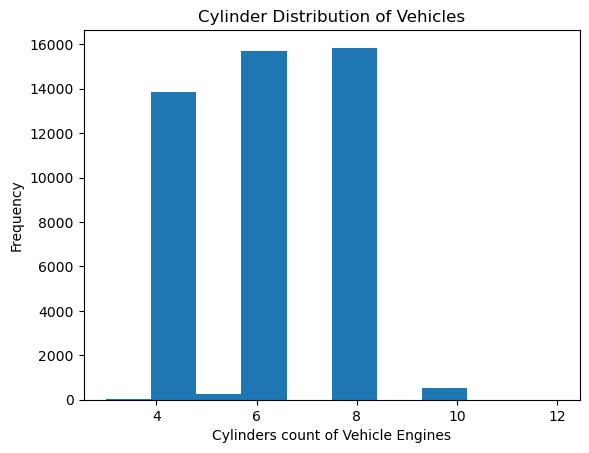

In [22]:
display(df_vehicles['cylinders'].describe())
df_vehicles['cylinders'].plot(kind='hist')
plt.title('Cylinder Distribution of Vehicles')
plt.xlabel('Cylinders count of Vehicle Engines')
plt.plot()

**Notes**
It seems that v6 engines are the most common but closly followed by v8. 

[]

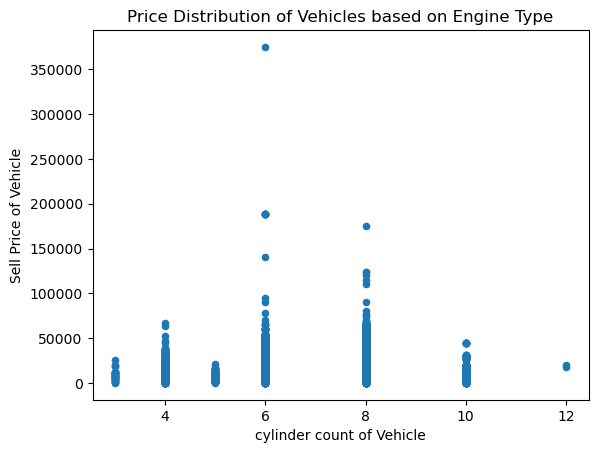

In [24]:
df_vehicles.plot(kind='scatter',x='cylinders',y='price')
plt.title('Price Distribution of Vehicles based on Engine Type')
plt.xlabel('cylinder count of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.plot()

**Conclusion**
There does not seem to be a very good corrilation between price and engine type.  While v6 and v8's have higher sale prices than v4's this trend dose not continue to v10' or v12's.  Insead it servers to show that the most common engine types are also in the most expensive cars.  

### Categorical Analysis

1. **Transmission:** Examine the distribution of transmission types (e.g., manual, automatic). Visualize using a bar chart.
2. **Type:** Check for the most common types of vehicles (e.g., sedan, SUV, truck). Visualize using a bar chart.
3. **Fuel:** Examine the distribution of fuel types (e.g., gasoline, diesel, hybrid). Visualize using a bar chart.
5. **Condition:** Examine the distribution of conditions (e.g., new, used, damaged). Visualize using a bar chart.

**Transmission**

count         51525
unique            3
top       automatic
freq          46902
Name: transmission, dtype: object

[]

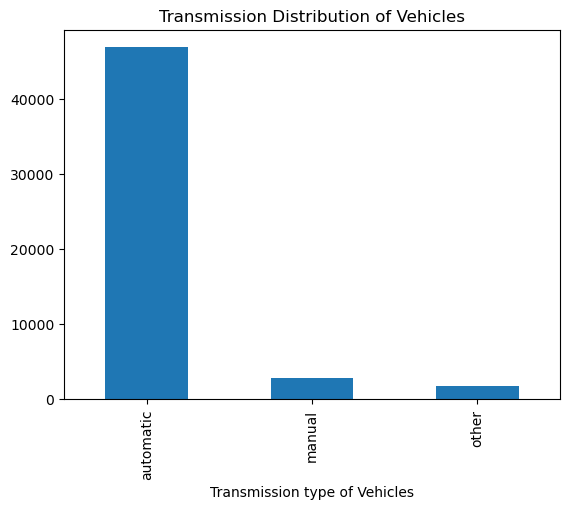

In [29]:
display(df_vehicles['transmission'].describe())
df_vehicles['transmission'].value_counts().plot(kind='bar')
plt.title('Transmission Distribution of Vehicles')
plt.xlabel('Transmission type of Vehicles')
plt.plot()

**Notes**
Automatic transmission is the most common type which is expected since the majorty of cars were made after 2000.  

[]

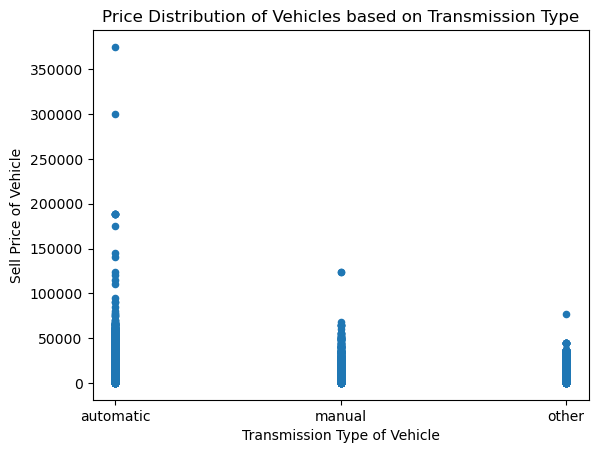

In [32]:
df_vehicles.plot(kind='scatter',x='transmission',y='price')
plt.title('Price Distribution of Vehicles based on Transmission Type')
plt.xlabel('Transmission Type of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.plot()

**Conclusion**
It seems that automatic and manual transmission types are very similar in the price the vehicales sell for.  The most expensive cars are in the automatic catagory, but there does not seem to be anything important with that.

**Type**

count     51525
unique       13
top         SUV
freq      12405
Name: type, dtype: object

[]

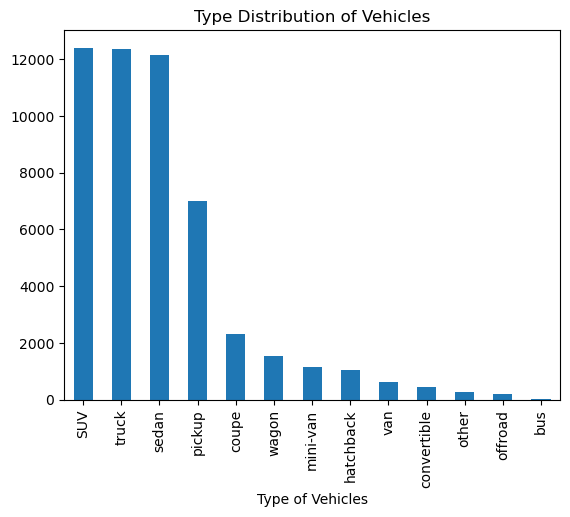

In [33]:
display(df_vehicles['type'].describe())
df_vehicles['type'].value_counts().plot(kind='bar')
plt.title('Type Distribution of Vehicles')
plt.xlabel('Type of Vehicles')
plt.plot()

**Notes**
There are 4 very common vehicle types and several more uncommon ones.  The types of vehicles are one of the most likely to affect the price.

[]

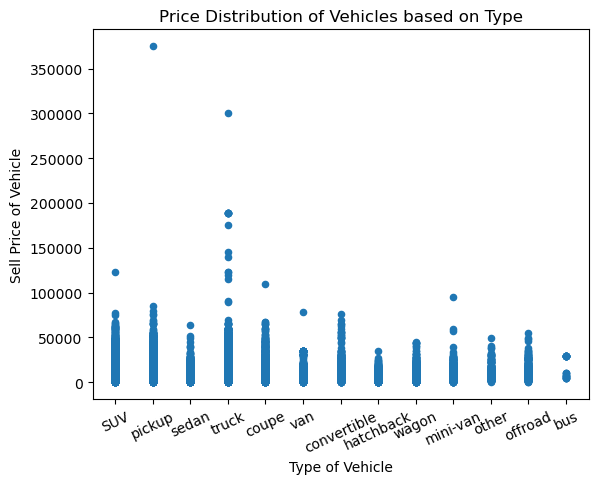

In [38]:
df_vehicles.plot(kind='scatter',x='type',y='price')
plt.title('Price Distribution of Vehicles based on Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.xticks(rotation = 25)
plt.plot()

**Conclusion**
The most expensive vehicles are pickups and trucks but the cost seems to be pretty uniform across all types.  It would be worth checking the numeric data across the vehicle types.  

**Fuel**

count     51525
unique        5
top         gas
freq      47288
Name: fuel, dtype: object

[]

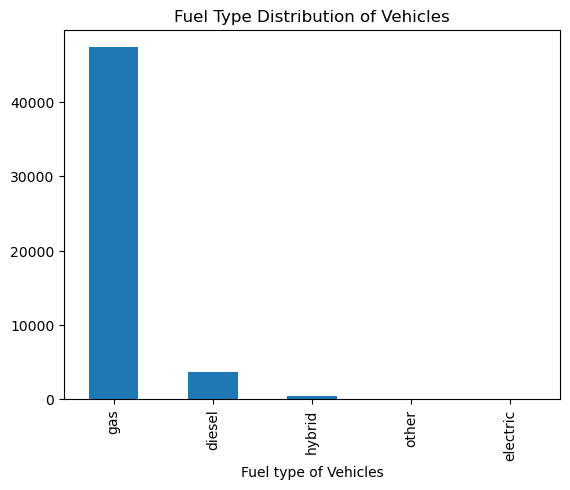

In [39]:
display(df_vehicles['fuel'].describe())
df_vehicles['fuel'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution of Vehicles')
plt.xlabel('Fuel type of Vehicles')
plt.plot()

[]

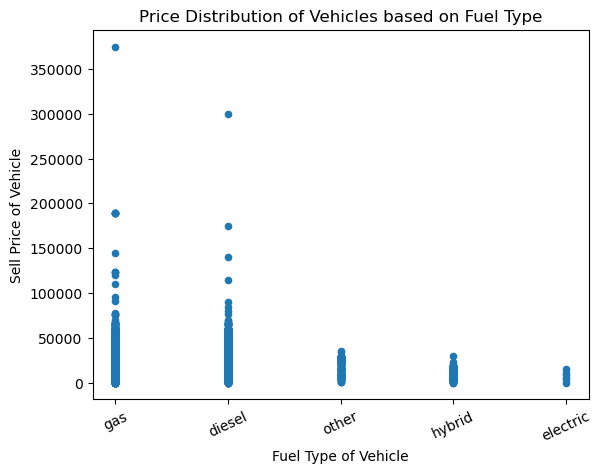

In [41]:
df_vehicles.plot(kind='scatter',x='fuel',y='price')
plt.title('Price Distribution of Vehicles based on Fuel Type')
plt.xlabel('Fuel Type of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.xticks(rotation = 25)
plt.plot()

**condition**

count         51525
unique            6
top       excellent
freq          24773
Name: condition, dtype: object

[]

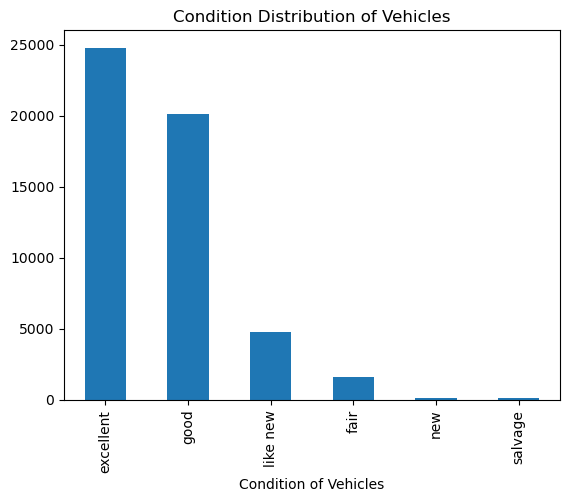

In [42]:
display(df_vehicles['condition'].describe())
df_vehicles['condition'].value_counts().plot(kind='bar')
plt.title('Condition Distribution of Vehicles')
plt.xlabel('Condition of Vehicles')
plt.plot()

[]

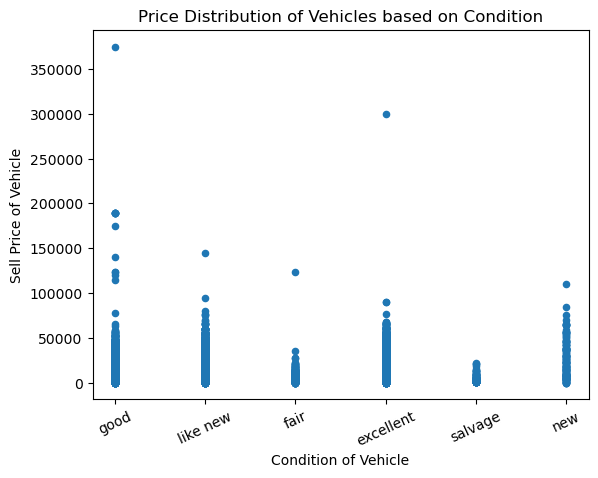

In [43]:
df_vehicles.plot(kind='scatter',x='condition',y='price')
plt.title('Price Distribution of Vehicles based on Condition')
plt.xlabel('Condition of Vehicle')
plt.ylabel('Sell Price of Vehicle')
plt.xticks(rotation = 25)
plt.plot()

**Conclusion**
The most expensive cars seem to be in good condition.  This suggests that the condition of the cars is not the defining factor in the price.  As long as the car is above "fair" quality the car will sell well.  Noteably there is little difference between "new", "excellent", and "like new" conditions in terms of price.  